# Fig. 5 panel E Sankey plot

In [1]:
import sys
import pandas as pd
import numpy as np
import os
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import anndata as ad
from pysankey import sankey

script_path = Path.cwd().parent.parent.parent  / "script"
data_path = Path.cwd().parent.parent.parent  / "data"
sys.path.append(str(script_path))

from utils import *

output_folder = Path.cwd() / "output"
os.makedirs(output_folder, exist_ok=True)

plt.rcParams['pdf.fonttype'] = 42

## Load data

In [2]:
timestamp = datetime.now().strftime('%Y-%m-%d')
print(f"Timestamp: {timestamp}")    

Timestamp: 2023-12-04


In [3]:
# manually set the timestamp to use the intermediate results from another date
# timestamp = "2023-12-04"

In [4]:
# load adata
csv_path = Path.cwd().parent / "panel_C" / "output" / f"{timestamp}_umap_table.csv"

try:
    # load the file
    umap_table = pd.read_csv(csv_path)
except FileNotFoundError:
    print(f"File {csv_path} not found.\nPlease run leiden analysis first (fig5 panel C) or specify the correct timestamp, current value is {timestamp}")
except pd.errors.ParserError:
    print(f"There was an error parsing the CSV file at {csv_path}.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

### Trajectory plot

In [5]:
embedding1 = np.vstack([umap_table['JointUMAP_uninf_1'], umap_table['JointUMAP_uninf_2']]).T
embedding2 = np.vstack([umap_table['JointUMAP_inf_1'], umap_table['JointUMAP_inf_2']]).T

# keep hits only
hits_idx = (umap_table['10d_mean_distance_traveled (200 bootstraps)'] > 2)

embedding1_hits = embedding1[hits_idx]
embedding2_hits = embedding2[hits_idx]

print(f"number of hits = {len(embedding1_hits)}")


number of hits = 414


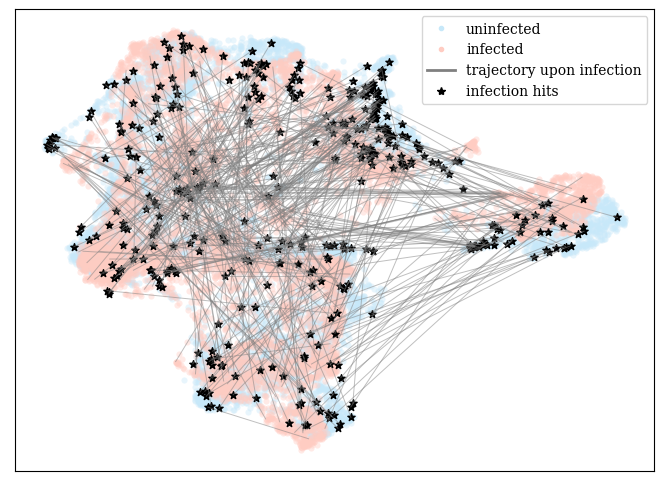

In [18]:
# Plot trajectory lines
plt.rcParams['pdf.fonttype'] = 42

#fig, ax = plt.subplots(figsize=(5.5, 4))
fig, ax = plt.subplots(figsize=(8.25, 6))

# Plot the two embeddings as scatter plots
ax.scatter(embedding1[:, 0], embedding1[:, 1], color='#C7E8F9', s=80, alpha=0.4, label='Uninfected', marker='.', linewidths=0,edgecolor=None)
ax.scatter(embedding2[:, 0], embedding2[:, 1], color='#FFCCC2', s=80, alpha=0.4, label='Infected', marker='.', linewidths=0,edgecolor=None)

# Plot trajectory lines    
for start, end in zip(embedding1_hits, embedding2_hits):
    # Draw line
    ax.plot([start[0], end[0]], [start[1], end[1]], color='grey', 
            linewidth=0.7, alpha=0.5)
    # Draw marker at the end point
for start, end in zip(embedding1_hits, embedding2_hits):
    ax.scatter(start[0], start[1], color='black', s=30, marker='*', edgecolor=None)

# Add legend
blue_dot =  mlines.Line2D([], [], color='#C7E8F9', marker='.', linestyle='None', label='uninfected')
red_dot = mlines.Line2D([], [], color='#FFCCC2', marker='.', linestyle='None', label='infected')
solid_line = mlines.Line2D([], [], color='grey', linestyle='-', linewidth=2, label='trajectory upon infection')
black_star = mlines.Line2D([], [], color='black', marker='*', linestyle='None', label='infection hits')
ax.legend(handles=[blue_dot, red_dot, solid_line, black_star])

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

plt.savefig(output_folder / "trajectory_and_startpoints_hits.pdf", format='pdf', bbox_inches='tight')
plt.show()